Overview?

Business Problem

# **Importing Packages**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Importing Project Data**

---

In [2]:
df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Aviation_Data.csv'

In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## **Cleaning Data**

---

In [ ]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

In [ ]:
# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# We will be looking at data from 2001 to 2022
usa_df = df[df['event_date'] > '2001-11-19']

#dropping the columns we will not be using
usa_df = df[['location','investigation_type','event_date','country','injury_severity','airport_name','aircraft_category','make', 'model',
  'number_of_engines', 'engine_type','injury_severity','total_fatal_injuries', 'total_uninjured', 'total_serious_injuries',
  'total_minor_injuries', 'latitude','longitude', 'amateur_built']]

In [ ]:
#Creating a new dataframe with data from the US
usa_df = df[df['country'] == 'United States']

# Split location column into city and state columns
usa_df[['city', 'state']] = usa_df['location'].str.split(', ', n=1, expand=True)

#Cleaning city names
usa_df['city'].str.title()

#We are only interested in airplanes in aircraft category
usa_df = usa_df.loc[~usa_df['aircraft_category'].isin(usa_df['aircraft_category'].value_counts().index[1:])]

C:\Users\18324\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#Cleaning the injury severity column
usa_df['injury_severity'] = usa_df['injury_severity'].replace(regex=r'Fatal\(\d+\)', value='Fatal')

In [ ]:
# Import necessary libraries
from geopy.geocoders import Nominatim
import pandas as pd

# Create geolocator object
geolocator = Nominatim(user_agent="my_app")

# Loop through each row in dataframe
for index, row in usa_df.iterrows():
    # Check if latitude and longitude are missing
    if pd.isnull(row['latitude']) or pd.isnull(row['longitude']):
        # Get location string
        location = str(row['airport_name']) + ', ' + str(row['country'])
        # Use geolocator to get latitude and longitude
        try:
            location = geolocator.geocode(location)
            usa_df.at[index, 'latitude'] = location.latitude
            usa_df.at[index, 'longitude'] = location.longitude
        except:
            pass

The "Total.Uninjured" column contains missing values. This column will be important, as we need to know the number of passengers to distinguish private from commercial flights. For this column we will impute the median value, which is 1, into the null values.

There are two other columns containing data on serious and minor injuries. Many of these contain missing values too. Our approach to this will be to look at the ratio of minor/serious injuries in the dataset to the total number of uninjured patients in the dataset. We will use this ratio to impute missing values.

In [ ]:
usa_df.loc[usa['total_fatal_injuries'].isna(), 'total_fatal_injuries']=0

minor_injuries=usa_df.loc[(usa_df['total_uninjured'].notna()) & (usa_df['total_minor_injuries'].notna())]
minor_injuries_ratio=minor_injuries['total_minor_injuries'].sum()/minor_injuries['total_uninjured'].sum()

serious_injuries=usa_df.loc[(usa_df['total_uninjured'].notna()) & (usa_df['total_serious_injuries'].notna())]
serious_injuries_ratio=serious_injuries['total_serious_injuries'].sum()/serious_injuries['total_uninjured'].sum()

usa_df.loc[usa_df['total_uninjured'].isna(), 'total_uninjured']=usa_df['total_uninjured'].median()
usa_df.loc[us_dfa['total_minor_injuries'].isna(), 'total_minor_injuries']=round(minor_injuries_ratio*usa_df['total_uninjured'], 0)
usa_df.loc[usa_df['total_serious_injuries'].isna(), 'total_serious_injuries']=round(serious_injuries_ratio*usa_df['total_uninjured'], 0)

**Private Plane Analysis**

In this project we will define private flights as those which carry less than 20 passengers. This number comes from our independent research of the difference between commercial and private flights. 

In [4]:
#create a copy of the dataframe
usa=usa_df.copy()

#create a new column for the estimated total number of passengers on board each flight
usa['passengers']=usa['total_uninjured']+usa['total_minor_injuries']+usa['total_serious_injuries']+usa['total_fatal_injuries']

#create a new dataframe focusing on private planes
private_planes=usa.loc[usa['passengers']<20]

#remove rows with null values in make or model column. This data is crucial to our analysis so rows with no make/model value are not useful.
private_planes=private_planes.dropna(subset=['make', 'model'])

#clean up the make column
private_planes['make']=private_planes['make'].str.lower()

private_planes.info()

NameError: name 'usa_df' is not defined

Next we will create visualizations to see which makes and models are most commonly involved in crashes, as well as which ones have the highest number of fatalities. We will examine the 20 most common of each.

In [ ]:
#Creating a figure showing investigation occurance by Airplane Make
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['make'].value_counts().index[:20], y=private_planes['make'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Makes Found in Investigations')
makes.set_xlabel('Make', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['make'].value_counts().index[:20], rotation=-45, ha='left');
plt.show()

#Showing fatalities by Airplane Make
fatalities=private_planes.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Make', fontsize=15)
f.set_xlabel('Make', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()


#Creating a figure showing investigation frequency by Airplane Model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['model'].value_counts().index[:20], y=private_planes['model'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Models Found in Accidents', fontsize=15)
makes.set_xlabel('Model', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['model'].value_counts().index[:20], rotation=-45, ha='center');
plt.show()

#Showing fatalities by Airplane Model
fatalities=private_planes.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Model', fontsize=15)
f.set_xlabel('Model', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()

We can see that although Cessna has nearly twice as many investigations as Piper, the difference in fatalities is less stark. As for models, the 172 was the most common model investigated but accounted for only the 3rd most deaths. The A36 model accounted for the most fatalities, despite being only the 9th most common model involved in investigations.

Ultimately a plane cannot be several types of makes and models -it can only be one. Therefore the next step in our analysis will be to combine make and model into one column, and use this column to make our final recommendations. Specifically, we will look to see which models have the lowest percentage of deaths and injuries out of their total passengers.

We will look at all planes which flew more than 100 passengers total (to ensure we have a significant sample size). This comes out to 91 total make/models. From these 91 we will select those which tend to be the safest. The strategy will be to examine the lowest 20 death rates, lowest 20 serious injury rates, and lowest 20 minor injury rates, and then see which planes appear in all 3. We will also see which of those planes tended to have less damage to the aircraft.

In [6]:
#creating a new column combining make and model
private_planes['plane']=private_planes['make'].str[0:] + ' ' + private_planes['model'].str[0:]

#grouping the data by planes which carried over 100 passengers in total
most_common_private_planes=private_planes.groupby('plane')['passengers'].sum().sort_values(ascending=False)[private_planes.groupby('plane')['passengers'].sum().sort_values(ascending=False).values>100]
top_private_planes=private_planes.loc[private_planes['plane'].isin(most_common_private_planes.index)]

#finding the fatality rate for each plane
death_rates=top_private_planes.groupby('plane')['total_fatal_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
death_rates=death_rates.sort_values(ascending=False)

#finding the serious rate for each plane
serious_injury_rates=top_private_planes.groupby('plane')['total_serious_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
serious_injury_rates=serious_injury_rates.sort_values(ascending=False)

#finding the minor rate for each plane
minor_injury_rates=top_private_planes.groupby('plane')['total_minor_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
minor_injury_rates=serious_injury_rates.sort_values(ascending=False)

NameError: name 'private_planes' is not defined

Lowest 20 death rates, serious injury rates, and minor injury rates:

In [ ]:
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=top_91_death_rates.index[-20:], y=top_91_death_rates.values[-20:])
f.set_title('Death Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Death Rate', fontsize=15)
f.set_xticklabels(top_91_death_rates.index[-20:], rotation=-45, ha='left');

fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=serious_injury_rates.index[-20:], y=serious_injury_rates.values[-20:])
f.set_title('Serious Injury Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Serious Injury Rate', fontsize=15)
f.set_xticklabels(serious_injury_rates.index[-20:], rotation=-45, ha='left');

fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=minor_injury_rates.index[-20:], y=minor_injury_rates.values[-20:])
f.set_title('Minor Injury Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Minor Injury Rate', fontsize=15)
f.set_xticklabels(minor_injury_rates.index[-20:], rotation=-45, ha='left');

top_private_planes['substantial']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Substantial' else 0)
top_private_planes['destroyed']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Destroyed' else 0)
top_private_planes['minor']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Minor' else 0)

substantial_damage=top_private_planes.groupby('plane')['substantial'].sum()
destroyed=top_private_planes.groupby('plane')['destroyed'].sum().sort_values(ascending=False)
minor_damage=top_private_planes.groupby('plane')['minor'].sum().sort_values(ascending=False)

minor_damage_table=pd.merge(minor_damage, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)
substantial_damage_table=pd.merge(substantial_damage, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)
destroyed_table=pd.merge(destroyed, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)

damage_table=minor_damage_table.merge(substantial_damage_table, how='inner', left_index=True, right_index=True).merge(destroyed_table, how='inner', left_index=True, right_index=True)
damage_table=damage_table.rename({'plane': 'planes'}, axis=1)
damage_table=damage_table.drop(columns=['plane_x', 'plane_y'], axis=1)

damage_table['unknown']=damage_table['planes']-(damage_table['minor']+damage_table['substantial']+damage_table['destroyed'])
damage_table

safest_planes=[x for x in minor_injury_rates.index[-20:] if x in serious_injury_rates.index[-20:] and x in death_rates.index[-20:]]
minor_injury_rates.index[-20:]
serious_injury_rates.index[-20:]
death_rates.index[-20:]

safest_planes

damage_table_safe=damage_table.loc[damage_table.index.isin(safest_planes)]

NameError: name 'damage_table_safe' is not defined

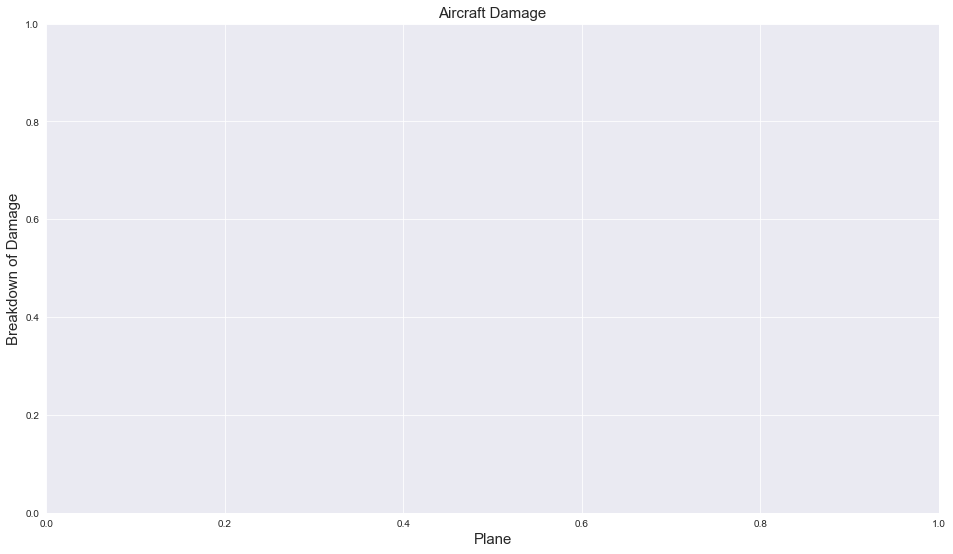

In [7]:
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')

ax.set_title('Aircraft Damage', fontsize=15)
ax.set_xlabel('Plane', fontsize=15)
ax.set_ylabel('Breakdown of Damage', fontsize=15)

f_4=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes']+damage_table_safe['destroyed']/damage_table_safe['planes']+damage_table_safe['unknown']/damage_table_safe['planes'], color='black')
f_3=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes']+damage_table_safe['destroyed']/damage_table_safe['planes'], color='red')
f_2=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes'], color='blue')
f_1=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes'], color='green');

**Commerical Plane Analysis**

**Location of Operation Analysis**